https://en.wikipedia.org/wiki/Price%27s_model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def init_web(num_authors, seed = None):
    # create data array[array[int]] where arrays of data are citing_author_id, citing_paper_id. 
    # later we concatenate cited_author_id, and cited_paper_id, and time
    data = np.array(np.arange(num_authors))
    # create an array of what author is getting cited
    if seed != None:
        np.random.seed(seed)
    cited_authors = np.random.choice(data, num_authors, replace=True)
    # authors cannot cite themselves on the first paper
    while any(np.where(cited_authors == data, True, False)):
        cited_authors = np.random.choice(data, num_authors, replace=True)
    round_of_papers = np.array([cited_authors])
    #print(data,round_of_papers)
    return np.array([data,cited_authors,np.zeros(len(data))]) #np.array(data,cited_authors,))

def get_in_degrees(data):
    citing_authors = np.unique(data[0,:])# , return_counts=True)
    
    return dict((x,list(data[1,:]).count(x)) for x in citing_authors)


def get_degree_counts(in_degrees):

    return dict((count,list(in_degrees.values()).count(count)) for count in in_degrees.values())

    
def get_p_k(degree_counts):
    total_in_degrees = sum(degree_counts.values())
    return dict((key,degree_counts[key] / total_in_degrees) for key in degree_counts)

def get_k_probs(p_k, k_0 = 1):
    p_k_degrees  = np.array(list(p_k.keys())) 
    p_k_vals  = np.array(list(p_k.values())) 
    return ((p_k_degrees + k_0) * p_k_vals) / sum((p_k_degrees + k_0) * p_k_vals)

def get_citations(data):
    in_degrees = get_in_degrees(data)
    degree_counts = get_degree_counts(in_degrees)
    p_k = get_p_k(degree_counts)
    k_probs = get_k_probs(p_k)
    
    # for every unqiue author in our data, tell them which degre of a paper they should cite
    
    unique = np.unique(data[0,:])
    #print(counts)
    random_degrees = np.random.choice(list(degree_counts.keys()),len(unique) , replace=True, p=k_probs)
    
    in_degrees = np.array(list(in_degrees.items()))
    
    random_authors = []
    for degree in random_degrees:
        author_id_in_degree_index = np.where(in_degrees[:,1] == degree)
        authors_to_cite = in_degrees[:,0][author_id_in_degree_index]
        random_authors.append(np.random.choice(authors_to_cite))
    return random_authors

def get_new_paper_ids(data, num_authors):
    num_papers = data[1,:].max() + 1
    return np.arange(num_papers, num_papers + num_authors)

def get_new_cited_authors(data, citations):
    
    # CAUTION. once we have multiple citations then the paper_id shows up multiple times in papers[1,:]
    # i think this will be fine since we would only be grabbing the first index where the paper is cited and that corresponds to the same author regardless

    return data[0,:][[int(c) for c in citations]]

def take_steps_original_save_in_case(data, num_steps, num_authors):
    for i in range(1,steps + 1):
        
        new_citations = get_citations(data)
        #print(new_citations)
        max_time = max(data[2,:])
        
        step = np.array([np.arange(num_authors), new_citations,np.ones(len(new_citations)) + max_time])
    
        data = np.concatenate([data,step], axis = 1)
       
    
    data_df = pd.DataFrame(data.T, columns = ['citing_author','cited_author', 'time' ] )
    return data, data_df

def take_steps(data, num_steps, num_authors,risk, max_cite = [1]):
    pub_chance = np.array([[np.random.uniform(0,1) for i in range(num_authors)]])
    publishing_authors_index = np.where(risk > pub_chance)[1]

    
    for step in range(0,num_steps):
        max_time = max(data[2,:])
        for i in range(max_cite[step]):
            # we are probably haveing people cite the same person twice, which is a bit nonsensical
            new_citations = get_citations(data)
            single_cite = np.array([np.arange(num_authors), new_citations,np.ones(len(new_citations)) + max_time])
    
            data = np.concatenate([data,single_cite], axis = 1)
            
    
    data_df = pd.DataFrame(data.T, columns = ['citing_author','cited_author', 'time'] )
    return data, data_df
    
def plot_cumsum(data,unique_items, var = 'cited_author', legend = True):
    for item in unique_items:
        plt.plot(data[data[var] == item]['time'].value_counts(sort = False).cumsum())
    if legend:
        plt.legend(unique_items)
    plt.title('%s: Cumulative Sum of Citations'%var);
    plt.xlabel('Time', fontsize=12);
    plt.ylabel('Citations', fontsize=12);
    plt.show()

def plot_citations(data,unique_items, var = 'cited_author', legend = True):
    for item in unique_items:
        plt.plot(data[data[var] == item]['time'].value_counts(sort = False))
    if legend:
        plt.legend(unique_items)
    plt.title('%s: Citations Over Time'%var);
    plt.xlabel('Time', fontsize=12);
    plt.ylabel('Citations', fontsize=12);
    plt.show()


In [35]:
#np.concatenate([np.array([np.random.rand(3)]),init_web(3, seed = 42)])
prob_publish = [np.random.uniform(0,1) for i in range(3)]
prob_publish

[0.5924145688620425, 0.046450412719997725, 0.6075448519014384]

In [28]:
num_authors = 100

risk = np.array([[np.random.uniform(0,1) for i in range(num_authors)]])
pub_chance = np.array([[np.random.uniform(0,1) for i in range(num_authors)]])
#print(risk,pub_chance)
publishing_authors_index = np.where(risk > pub_chance)[1]
print(publishing_authors_index)

[ 0  2  3  4  6  9 11 15 16 20 21 25 29 30 31 34 35 37 39 40 42 44 45 47
 48 52 54 55 60 62 63 64 65 71 77 79 81 84 85 88 92 93 96]


In [13]:
num_authors = 100
papers = init_web(num_authors, seed= 42)
#print(papers)
sim = papers
# how many times will every scientist cite at each step?
time_steps = 60

cite_nums = np.random.randint(9, size = time_steps)
sim, sim_df = take_steps(sim,len(cite_nums),num_authors,cite_nums )

#get_citations(papers)

#in_degrees = get_in_degrees(papers)
#degree_counts = get_degree_counts(in_degrees)
#get_p_k(degree_counts)


In [11]:
# get the authors average number of citations
sim_df

,citing_author,cited_author,time
0,0.0,6.0,0.0
1,1.0,3.0,0.0
2,2.0,7.0,0.0
3,3.0,4.0,0.0
4,4.0,6.0,0.0
...,...,...,...
2525,5.0,4.0,57.0
2526,6.0,3.0,57.0
2527,7.0,6.0,57.0
2528,8.0,3.0,57.0


In [ ]:
sim

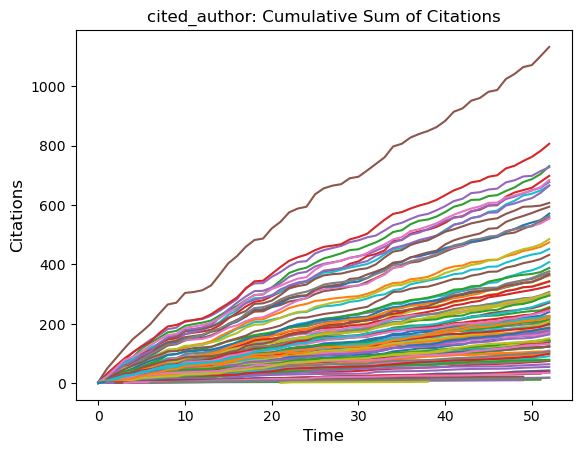

In [14]:
plot_cumsum(sim_df,sim_df['cited_author'].unique(), legend = False)

In [145]:
sim[:,-60:]

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,   0.,   1.,   2.,
          3.,   4.,   5.,   6.,   7.,   8.,   9.,   0.,   1.,   2.,   3.,
          4.,   5.,   6.,   7.,   8.,   9.,   0.,   1.,   2.,   3.,   4.,
          5.,   6.,   7.,   8.,   9.],
       [  0.,   3.,   2.,   2.,   2.,   0.,   0.,   9.,   4.,   4.,   6.,
          1.,   7.,   6.,   0.,   4.,   7.,   7.,   4.,   5.,   9.,   2.,
          9.,   6.,   6.,   5.,   2.,   1.,   1.,   1.,   6.,   3.,   0.,
          8.,   7.,   7.,   8.,   1.,   9.,   6.,   9.,   9.,   4.,   6.,
          7.,   0.,   9.,   8.,   4.,   4.,   2.,   4.,   0.,   8.,   0.,
          2.,   9.,   7.,   2.,   2.],
       [ 95.,  95.,  95.,  95.,  95.,  95.,  95.,  95.,  95.,  95.,  96.,
         96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,  96.,  97.,  97.,
         97.,  97.,  97.,  97.,  9

In [ ]:
np.savetxt('%d_authors_%d_steps_%d_maxcite_numpy.txt'% (num_authors, steps, 1), sim, fmt='%d')
#b = np.loadtxt('test1.txt', dtype=int)

In [103]:
in_degrees = get_in_degrees(sim)
in_degrees
#get_degree_counts()


{0.0: 2,
 1.0: 1,
 2.0: 5,
 3.0: 2,
 4.0: 4,
 5.0: 0,
 6.0: 5,
 7.0: 7,
 8.0: 1,
 9.0: 3}

In [104]:
#(degree,list(in_degrees.values()).count(degree)) for degree in in_degrees.keys()

In [93]:
list(in_degrees.values())

[10, 14, 11, 10, 12, 11, 10, 10, 12, 10]

In [94]:
in_degrees.keys()

dict_keys([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])

In [95]:
in_degrees

{0.0: 10,
 1.0: 14,
 2.0: 11,
 3.0: 10,
 4.0: 12,
 5.0: 11,
 6.0: 10,
 7.0: 10,
 8.0: 12,
 9.0: 10}